In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [4]:
data_name = "transformed_business"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

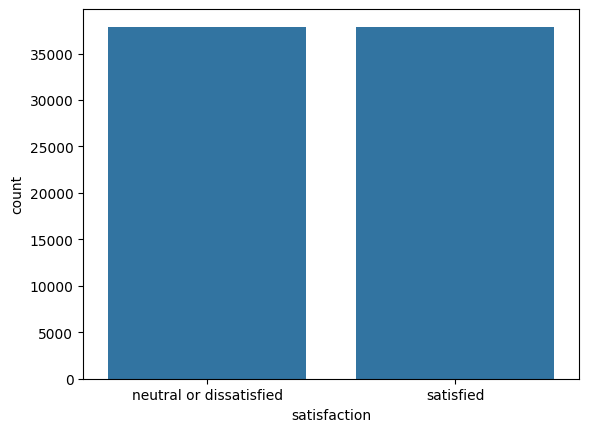

In [5]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [6]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75775,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,26,1127,0
75776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,28,1532,0
75777,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,38,3496,3
75778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,31,1919,0


In [7]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
75775    neutral or dissatisfied
75776    neutral or dissatisfied
75777    neutral or dissatisfied
75778    neutral or dissatisfied
75779    neutral or dissatisfied
Name: satisfaction, Length: 75780, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (53046, 77) and test set is :(22734, 77)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17498508, -0.40604592, -0.49105237, ...,  0.01405142,
        -0.01520397, -0.53212404],
       [-0.17498508, -0.40604592,  2.03644268, ..., -0.90483687,
         0.72642375,  3.31612533],
       [-0.17498508,  2.46277561, -0.49105237, ..., -0.90483687,
         0.06365489, -0.53212404],
       ...,
       [-0.17498508,  2.46277561, -0.49105237, ..., -0.44539273,
         0.61655298,  1.32073677],
       [-0.17498508,  2.46277561, -0.49105237, ..., -1.36428102,
         0.81591527, -0.53212404],
       [-0.17498508, -0.40604592, -0.49105237, ..., -0.52196675,
        -0.64784698, -0.53212404]])

## Set paramiter CV

In [10]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## K-NN(K Nearest Neighbours)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.104717 วินาที


In [12]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 97.13 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.98      0.97     11333
              satisfied       0.98      0.97      0.97     11401

               accuracy                           0.97     22734
              macro avg       0.97      0.97      0.97     22734
           weighted avg       0.97      0.97      0.97     22734



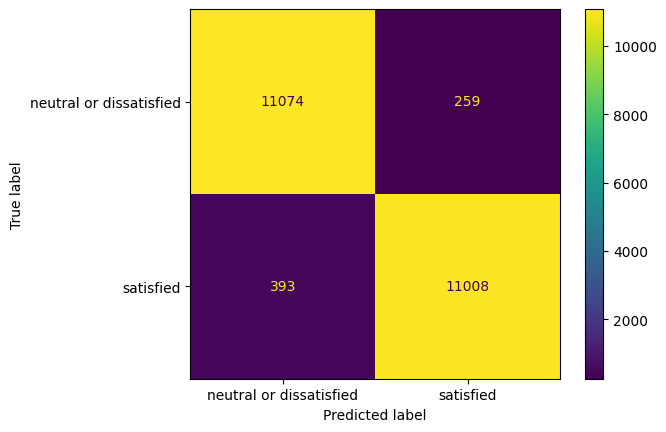

In [13]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_knn.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

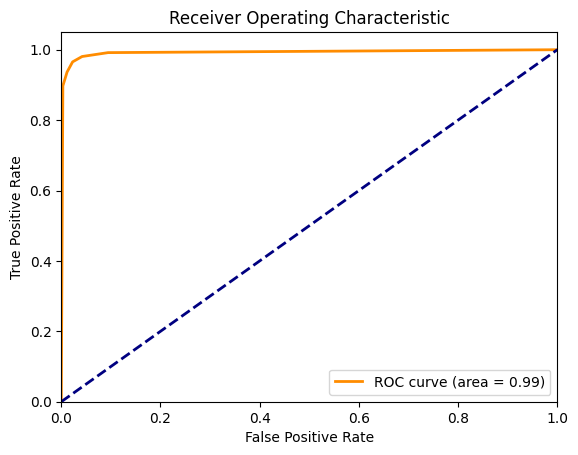

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# แปลง y_test เป็นค่าตัวเลข
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# ทำนายโอกาสของแต่ละ class
y_prob = model_knn.predict_proba(X_test)[:, 1]

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# แสดงกราฟ ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.96805202 0.97285835 0.96946565 0.97172745 0.9689002  0.97370653
 0.97567873 0.9739819  0.96662896 0.97171946 0.9739819  0.97285068
 0.97313348 0.96634615 0.96606335]
Mean CV Accuracy: 0.9710
Standard Deviation CV Accuracy: 0.0031
เวลาที่ใช้ในการทำ Cross Validation: 5.063713 วินาที


In [16]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9796026090562908
Test Accuracy: 0.971320489135216


## Save Model Predic

In [17]:
import pickle
pickle_out = open("../../pipelines/model_KNN_business.pkl", mode = "wb")
pickle.dump(model_knn, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_KNN.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [18]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
7893,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,34,888,1,neutral or dissatisfied
28631,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,1,41,1475,21,satisfied
39544,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,31,3118,0,neutral or dissatisfied
14960,0,0,0,1,0,0,0,0,0,1,...,1,0,1,1,0,1,40,102,26,neutral or dissatisfied
59548,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,68,1379,1,neutral or dissatisfied
53010,0,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,57,929,0,satisfied
1949,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,48,2722,0,satisfied
17427,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,22,308,16,satisfied
60715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,64,1378,14,neutral or dissatisfied
74261,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,26,227,0,neutral or dissatisfied


In [19]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
7893,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,34,888,1
28631,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,1,41,1475,21
39544,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,31,3118,0
14960,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,1,0,1,40,102,26
59548,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,68,1379,1
53010,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,57,929,0
1949,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,48,2722,0
17427,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,22,308,16
60715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,64,1378,14
74261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,26,227,0


In [20]:
y_sam = df_sam.iloc[:,-1]
y_sam


7893     neutral or dissatisfied
28631                  satisfied
39544    neutral or dissatisfied
14960    neutral or dissatisfied
59548    neutral or dissatisfied
53010                  satisfied
1949                   satisfied
17427                  satisfied
60715    neutral or dissatisfied
74261    neutral or dissatisfied
34213    neutral or dissatisfied
19579                  satisfied
12340                  satisfied
72908    neutral or dissatisfied
39558                  satisfied
18727                  satisfied
29943                  satisfied
40012                  satisfied
52900                  satisfied
36610                  satisfied
Name: satisfaction, dtype: object

In [21]:
model = pickle.load(open("../../pipelines/model_KNN_business.pkl", 'rb'))
scaler_1 = pickle.load(open("../../pipelines/scaler_KNN.pkl", 'rb'))

scaler_new = scaler_1.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied'
 'satisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied'
 'satisfied' 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied'
 'satisfied' 'satisfied' 'satisfied']
Accuracy of Knn is : 100.0 % .
